# Importation des bibliothèques nécessaires

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random

import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

from sklearn.model_selection import train_test_split

# Chargement du dataset de train

In [2]:
#Chargement des données
intents_file = open('intentsJJE.json').read()
intents = json.loads(intents_file)

# Tokenisation des données de train

In [3]:
#Prétraitement des données avec une tokenisation
words=[]
classes = []
documents = []
ignore_letters = ['!', '?', ',', '.']

for intent in intents['intents']:
    for pattern in intent['patterns']:
        #Permet de tokenisez chaque mot 
        word = nltk.word_tokenize(pattern)
        words.extend(word)
        #Création d'un document comportant tous les jetons d'une classe
        documents.append((word, intent['tag']))
        # Ajout de la classe à la liste des classes
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
print(documents)

[(['Bonjour'], 'salutations introduction'), (['Salut'], 'salutations introduction'), (['Coucou'], 'salutations introduction'), (['Hey'], 'salutations introduction'), (['Hola'], 'salutations introduction'), (['Yo'], 'salutations introduction'), (['EnchantÃ©'], 'salutations introduction'), (['Hello'], 'salutations introduction'), (['Salut'], 'salutations fin'), (['A', 'la', 'prochaine'], 'salutations fin'), (['Au', 'revoir'], 'salutations fin'), (['A', 'plus'], 'salutations fin'), (['Bonne', 'soirÃ©e'], 'salutations fin'), (['Ciao'], 'salutations fin'), (['Bisous'], 'salutations fin'), (['A', 'bientÃ´t'], 'salutations fin'), (['Merci'], 'remerciements'), (['Merci', 'beaucoup'], 'remerciements'), (['Super', ',', 'merci'], 'remerciements'), (['Je', 'te', 'remercie', 'beaucoup'], 'remerciements'), (["C'est", 'trÃ¨s', 'gentil', ',', 'merci'], 'remerciements'), (['Je', 'tiens', 'Ã', 'te', 'remercier'], 'remerciements'), (['Encore', 'une', 'fois', 'merci'], 'remerciements'), (['Comment', 'tu',

# Lemmatisation des données de train

In [4]:
# Prétraiter les données avec une lemmatisation
# Lemmatisation des données afin de supprimer les doublons
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_letters]
words = sorted(list(set(words)))

classes = sorted(list(set(classes)))
# Les documents sont la combinaison entre les intents et les patterns
print (len(documents), "documents")
# Les intents sont les classes 
print (len(classes), "classes", classes)
# les mots sont tout le vocabulaire 
print (len(words), "unique lemmatized words", words)

pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

105 documents
31 classes ['Beau temps', 'Eau', 'FiÃ¨vre', 'Informations TV', 'Lecture', 'LumiÃ¨re', 'Mauvais temps', 'Musique', 'MÃ©tÃ©o', 'Radio', 'SantÃ©', 'Series', 'Sports', 'TV', 'Temps chaud', 'Temps froid', 'TempÃ©rature', 'TempÃªte', 'Vacances', 'actions', 'actualitÃ©s', 'chauffage', 'incomprÃ©hension', 'journÃ©e', 'remerciements', 'rendez-vous', 'ressentis', 'retours', 'salutations fin', 'salutations introduction', 'sentiments']
156 unique lemmatized words ["'", 'a', 'agrã©able', 'aimerais', 'annoncent', 'as-tu', 'au', "aujourd'hui", 'beau', 'beaucoup', 'besoin', 'bientã´t', 'bisous', 'boire', 'bon', 'bonjour', 'bonne', "c'est", 'ce', 'chaud', 'ciao', 'clim', 'climatisation', 'comme', 'comment', 'coucou', "d'eau", "d'un", 'de', 'dehors', 'dernier', 'derniã¨res', 'dois-tu', 'du', 'en', 'enchantã©', 'encore', 'est', 'et', 'faire', 'fais', 'fait', 'fait-il', 'ferme', 'fini', 'fiã¨vre', 'fois', 'fort', 'froid', 'gentil', 'hello', 'hey', 'hiver', 'hola', 'il', 'information', 'j', "

# Création des données de train

In [27]:
#Créer des données d'entrainement et de test
training = []
# Création d'une array vide pour les sorties du modèle. 
# Les sorties sont les classes, il faut donc une array de taille similaire
output_empty = [0] * len(classes)
# Création de bag of words pour chaque phrase
for doc in documents:
    # Initialisation du bag of word
    bag = []
    # Récupération de la liste des mots tokenisés pour chaque paterns
    pattern_words = doc[0]
    # Lemmatisation de chaque mot dans le but de créer une base de mots permettant de définir la classe
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # Création du bag of words
    for word in words:
        bag.append(1) if word in pattern_words else bag.append(0)
    # La sortie est '0' pour chaque tag, classe et '1' pour la classe actuelle, pour chaque pattern
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])
    
# Création des données de train
random.shuffle(training)
training = np.array(training)
X_train = list(training[:,0])
y_train = list(training[:,1])
print("Training data created")

Training data created


# Chargement des données de test

In [6]:
#Chargement des données
intents_file = open('testJJE.json').read()
intents = json.loads(intents_file)

# Tokenisation des données de test

In [7]:
#Prétraitement des données avec une tokenisation
words=[]
classes = []
documents = []
ignore_letters = ['!', '?', ',', '.']

for intent in intents['intents']:
    for pattern in intent['patterns']:
        #Permet de tokenisez chaque mot 
        word = nltk.word_tokenize(pattern)
        words.extend(word)
        #Création d'un document comportant tous les jetons d'une classe
        documents.append((word, intent['tag']))
        # Ajout de la classe à la liste des classes
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
print(documents)

[(['Bonsoir'], 'salutations introduction'), (['Salut'], 'salutations introduction'), (['Salut'], 'salutations fin'), (['Je', 'te', 'dis', 'aurevoir'], 'salutations fin'), (['Salut', ',', 'a', 'plus'], 'salutations fin'), (['Je', 'te', 'souhaite', 'une', 'bonne', 'soirÃ©e'], 'salutations fin'), (["C'est", 'trÃ¨s', 'gentil', ',', 'merci', 'beaucoup'], 'remerciements'), (['Je', 'tiens', 'Ã', 'te', 'remercier', 'encore', 'une', 'fois'], 'remerciements'), (['Comment', 'tu', 'vas', '?'], 'sentiments'), (['Comment', 'ca', 'va', "aujourd'hui", '?'], 'sentiments'), (['Que', 'fais', 'tu', '?'], 'actions'), (["Qu'est", 'tu', 'entrain', 'de', 'faire', '?'], 'actions'), (["Qu'il", 'y', 'a', 't-il', 'de', 'neuf', '?'], 'actions'), (['Tu', 'as', 'mal', 'quelque', 'part', '?'], 'ressentis'), (['Tu', 'te', 'sens', 'comment', '?'], 'ressentis'), (['Tu', 'es', 'au', 'courant', 'de', "l'actualitÃ©"], 'actualitÃ©s'), (['Tu', 'as', 'vu', 'ce', "qu'il", 'se', 'passe', '?'], 'actualitÃ©s'), (['Que', 'fais', '

# Lemmatisation des données de test

In [8]:
# Prétraiter les données avec une lemmatisation
# Lemmatisation des données afin de supprimer les doublons
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_letters]
words = sorted(list(set(words)))

classes = sorted(list(set(classes)))
# Les documents sont la combinaison entre les intents et les patterns
print (len(documents), "documents")
# Les intents sont les classes 
print (len(classes), "classes", classes)
# les mots sont tout le vocabulaire 
print (len(words), "unique lemmatized words", words)

pickle.dump(words,open('words1.pkl','wb'))
pickle.dump(classes,open('classes1.pkl','wb'))

56 documents
31 classes ['Beau temps', 'Eau', 'FiÃ¨vre', 'Informations TV', 'Lecture', 'LumiÃ¨re', 'Mauvais temps', 'Musique', 'MÃ©tÃ©o', 'Radio', 'SantÃ©', 'Series', 'Sports', 'TV', 'Temps chaud', 'Temps froid', 'TempÃ©rature', 'TempÃªte', 'Vacances', 'actions', 'actualitÃ©s', 'chauffage', 'incomprÃ©hension', 'journÃ©e', 'remerciements', 'rendez-vous', 'ressentis', 'retours', 'salutations fin', 'salutations introduction', 'sentiments']
111 unique lemmatized words ['a', 'as-tu', 'au', "aujourd'hui", 'aurevoir', 'beau', 'beaucoup', 'boire', 'bonne', 'bonsoir', "c'est", 'ca', 'ce', 'chaud', 'chauffage', 'comment', 'courant', "d'aujourd'hui", 'de', 'dehors', 'dis', 'e', 'en', 'encore', 'entrain', 'est', 'et', 'faire', 'fais', 'fait', 'fiã¨vre', 'fois', 'foot', 'fort', 'froid', 'gentil', 'il', 'information', "j'ai", "j'aime", "j'aimerai", "j'allume", 'je', 'journal', "l'actualitã©", "l'eau", "l'orage", 'la', 'le', 'lira', 'lumiã¨re', 'mal', 'merci', 'musique', "n'aime", "n'est", 'neuf', 'o

# Création des données de test

In [25]:
#Créer des données d'entrainement et de test
training1 = []
# Création d'une array vide pour les sorties du modèle. 
# Les sorties sont les classes, il faut donc une array de taille similaire
output_empty1 = [0] * len(classes)
# Création de bag of words pour chaque phrase
for doc in documents:
    # Initialisation du bag of word
    bag_test = []
    # Récupération de la liste des mots tokenisés pour chaque paterns
    pattern_words = doc[0]
    # Lemmatisation de chaque mot dans le but de créer une base de mots permettant de définir la classe
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # Création du bag of words
    for word in words:
        bag_test.append(1) if word in pattern_words else bag_test.append(0)
    # La sortie est '0' pour chaque tag, classe et '1' pour la classe actuelle, pour chaque pattern
    output_row = list(output_empty1)
    output_row[classes.index(doc[1])] = 1
    training1.append([bag_test, output_row])
    
# Création des données de train
random.shuffle(training1)
training1 = np.array(training1)
X_test = list(training1[:,0])
y_test = list(training1[:,1])
print("Testing data created")

Testing data created


# Utilisation d'un modèle de base

In [28]:
import pandas
# Création du modèle
# l'entrée nécessite autant de neurones que de données d'entraintement X_train
# La sortie nécessite autant de neurones que de classes y_train
model = Sequential()
model.add(Dense(128, input_shape=(len(X_train[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y_train[0]), activation='softmax'))

# Le modèle est compilé avec une descente de gradient stochastique
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fitting du modèle  
hist = model.fit(np.array(X_train), np.array(y_train), epochs=200, batch_size=5, verbose=1, validation_data=(X_test, y_test))

print("model created")

# Création d'un dataset permettant de récupérer les informations importantes du modèle.
data = pandas.DataFrame([
                ['acc max',max(hist.history['accuracy'])],
                ['val_acc max',max(hist.history['val_accuracy'])],
                ['mean acc', sum(hist.history['accuracy'])/len(hist.history['accuracy'])],
                ['mean val_acc', sum(hist.history['val_accuracy'])/len(hist.history['val_accuracy'])],      
                ['loss min',min(hist.history['loss'])],
                ['val_loss min',min(hist.history['val_loss'])],       
                ['mean loss', sum(hist.history['loss'])/len(hist.history['loss'])],  
                ['mean val_loss',sum(hist.history['val_loss'])/len(hist.history['val_loss'])]    
                ])
data.to_csv("C:/Users/Julie/Desktop/Projet/modelebase.csv")

Epoch 1/200
12/12 [==============================] - 0s 37ms/step - loss: 3.4473 - accuracy: 0.0357 - val_loss: 3.3971 - val_accuracy: 0.0714
Epoch 2/200
12/12 [==============================] - 0s 11ms/step - loss: 3.4107 - accuracy: 0.0000e+00 - val_loss: 3.3465 - val_accuracy: 0.1250
Epoch 3/200
12/12 [==============================] - 0s 8ms/step - loss: 3.3990 - accuracy: 0.0179 - val_loss: 3.2936 - val_accuracy: 0.1786
Epoch 4/200
12/12 [==============================] - 0s 8ms/step - loss: 3.3422 - accuracy: 0.1071 - val_loss: 3.2502 - val_accuracy: 0.2857
Epoch 5/200
12/12 [==============================] - 0s 8ms/step - loss: 3.3151 - accuracy: 0.1071 - val_loss: 3.2037 - val_accuracy: 0.2857
Epoch 6/200
12/12 [==============================] - 0s 8ms/step - loss: 3.2728 - accuracy: 0.1250 - val_loss: 3.1471 - val_accuracy: 0.2857
Epoch 7/200
12/12 [==============================] - 0s 9ms/step - loss: 3.2303 - accuracy: 0.1607 - val_loss: 3.0760 - val_accuracy: 0.2321
Epoch 8

12/12 [==============================] - 0s 9ms/step - loss: 0.8646 - accuracy: 0.6250 - val_loss: 0.1415 - val_accuracy: 0.9464
Epoch 59/200
12/12 [==============================] - 0s 13ms/step - loss: 0.4479 - accuracy: 0.8214 - val_loss: 0.1415 - val_accuracy: 0.9464
Epoch 60/200
12/12 [==============================] - 0s 13ms/step - loss: 0.4162 - accuracy: 0.9107 - val_loss: 0.1294 - val_accuracy: 0.9464
Epoch 61/200
12/12 [==============================] - 0s 16ms/step - loss: 0.6188 - accuracy: 0.8036 - val_loss: 0.1220 - val_accuracy: 0.9464
Epoch 62/200
12/12 [==============================] - 0s 16ms/step - loss: 0.5810 - accuracy: 0.8214 - val_loss: 0.1255 - val_accuracy: 0.9464
Epoch 63/200
12/12 [==============================] - 0s 17ms/step - loss: 0.5970 - accuracy: 0.7679 - val_loss: 0.1191 - val_accuracy: 0.9464
Epoch 64/200
12/12 [==============================] - 0s 15ms/step - loss: 0.5768 - accuracy: 0.8214 - val_loss: 0.1207 - val_accuracy: 0.9464
Epoch 65/200


12/12 [==============================] - 0s 14ms/step - loss: 0.4575 - accuracy: 0.8750 - val_loss: 0.0788 - val_accuracy: 0.9643
Epoch 116/200
12/12 [==============================] - 0s 10ms/step - loss: 0.3352 - accuracy: 0.9107 - val_loss: 0.0783 - val_accuracy: 0.9643
Epoch 117/200
12/12 [==============================] - 0s 11ms/step - loss: 0.3793 - accuracy: 0.8571 - val_loss: 0.0770 - val_accuracy: 0.9643
Epoch 118/200
12/12 [==============================] - 0s 11ms/step - loss: 0.3379 - accuracy: 0.9107 - val_loss: 0.0736 - val_accuracy: 0.9643
Epoch 119/200
12/12 [==============================] - 0s 10ms/step - loss: 0.2294 - accuracy: 0.9107 - val_loss: 0.0715 - val_accuracy: 0.9643
Epoch 120/200
12/12 [==============================] - 0s 11ms/step - loss: 0.4585 - accuracy: 0.8214 - val_loss: 0.0704 - val_accuracy: 0.9643
Epoch 121/200
12/12 [==============================] - 0s 9ms/step - loss: 0.2792 - accuracy: 0.8750 - val_loss: 0.0699 - val_accuracy: 0.9643
Epoch 1

12/12 [==============================] - 0s 8ms/step - loss: 0.1953 - accuracy: 0.9286 - val_loss: 0.0612 - val_accuracy: 0.9643
Epoch 173/200
12/12 [==============================] - 0s 8ms/step - loss: 0.2449 - accuracy: 0.9286 - val_loss: 0.0626 - val_accuracy: 0.9643
Epoch 174/200
12/12 [==============================] - 0s 8ms/step - loss: 0.1394 - accuracy: 1.0000 - val_loss: 0.0606 - val_accuracy: 0.9643
Epoch 175/200
12/12 [==============================] - 0s 9ms/step - loss: 0.2884 - accuracy: 0.8929 - val_loss: 0.0620 - val_accuracy: 0.9643
Epoch 176/200
12/12 [==============================] - 0s 10ms/step - loss: 0.1597 - accuracy: 0.9286 - val_loss: 0.0612 - val_accuracy: 0.9643
Epoch 177/200
12/12 [==============================] - 0s 9ms/step - loss: 0.1331 - accuracy: 0.9821 - val_loss: 0.0579 - val_accuracy: 0.9643
Epoch 178/200
12/12 [==============================] - 0s 10ms/step - loss: 0.2428 - accuracy: 0.9464 - val_loss: 0.0611 - val_accuracy: 0.9643
Epoch 179/2

# Analyse des performances du modèle

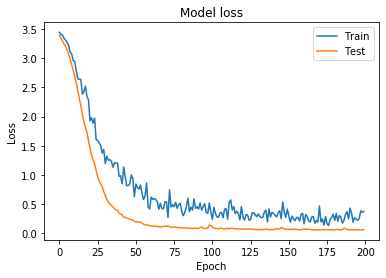

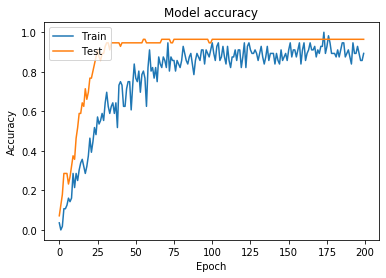

In [29]:
import matplotlib.pyplot as plt

# loss plot function
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')  
    plt.show()
    
# accuracy plot function    
def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# plot loss and accuracy curves
plot_loss(hist.history['loss'], hist.history['val_loss'])
plot_accuracy(hist.history['accuracy'], hist.history['val_accuracy'])

# Essais pour les combinaisons de fonctions d'activation

In [33]:
def get_model1(act,act2):
    model = Sequential()
    if act=='leaky_relu':
        model.add(Dense(128, input_shape=(len(X_train[0]),), activation=LeakyReLU()))
    else:   
        model.add(Dense(128, input_shape=(len(X_train[0]),), activation=act))
    model.add(Dropout(0.5))
    
    
    if act2=='leaky_relu':
        model.add(Dense(64, activation=LeakyReLU()))
    else:   
        model.add(Dense(64, activation=act2))
        
    model.add(Dropout(0.5))
    model.add(Dense(len(y_train[0]), activation='softmax'))
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

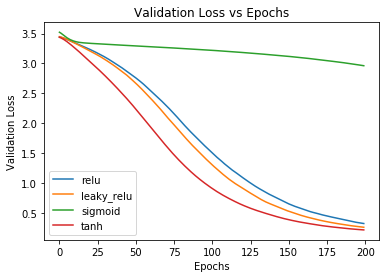

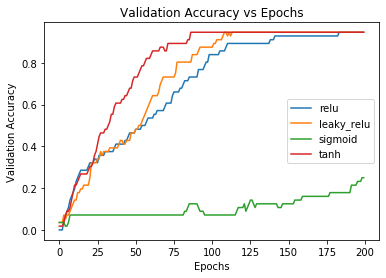

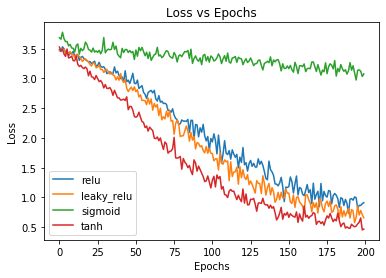

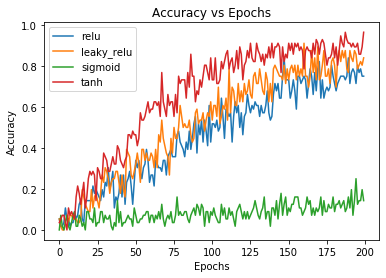

In [34]:
from keras.layers import Dense, LeakyReLU
loss_per_function = {}
acc_per_function = {}
val_loss_per_function = {}
val_acc_per_function = {}

activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']
for act in activations :
    model1 = get_model1('relu',act)
    history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0)
    val_loss_per_function[act]=history1.history['val_loss']
    val_acc_per_function[act]=history1.history['val_accuracy']
    loss_per_function[act]=history1.history['loss']
    acc_per_function[act]=history1.history['accuracy']
    
val_loss = pandas.DataFrame(val_loss_per_function)
val_acc = pandas.DataFrame(val_acc_per_function)
loss = pandas.DataFrame(loss_per_function)
acc = pandas.DataFrame(acc_per_function)

val_loss.plot()
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.show()

val_acc.plot()
plt.title('Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

loss.plot()
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

acc.plot()
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

data = pandas.DataFrame([['1st = RELU','Relu', 'leaky_relu', 'sigmoid', 'tanh'],
                ['acc max',max(acc.relu),max(acc.leaky_relu),max(acc.sigmoid),max(acc.tanh)],
                ['val_acc max',max(val_acc.relu),max(val_acc.leaky_relu),max(val_acc.sigmoid),max(val_acc.tanh)],
                ['mean acc', sum(acc.relu)/len(acc.relu),sum(acc.leaky_relu)/len(acc.leaky_relu),sum(acc.sigmoid)/len(acc.sigmoid),sum(acc.tanh)/len(acc.tanh)],
                ['mean val_acc', sum(val_acc.relu)/len(val_acc.relu),sum(val_acc.leaky_relu)/len(val_acc.leaky_relu),sum(val_acc.sigmoid)/len(val_acc.sigmoid),sum(val_acc.tanh)/len(val_acc.tanh)],      
                ['loss min',min(loss.relu),min(loss.leaky_relu),min(loss.sigmoid),min(loss.tanh)],
                ['val_loss min',min(val_loss.relu),min(val_loss.leaky_relu),min(val_loss.sigmoid),min(val_loss.tanh)],       
                ['mean loss', sum(loss.relu)/len(loss.relu),sum(loss.leaky_relu)/len(loss.leaky_relu),sum(loss.sigmoid)/len(loss.sigmoid),sum(loss.tanh)/len(loss.tanh)],  
                ['mean val_loss',sum(val_loss.relu)/len(val_loss.relu),sum(val_loss.leaky_relu)/len(val_loss.leaky_relu),sum(val_loss.sigmoid)/len(val_loss.sigmoid),sum(val_loss.tanh)/len(val_loss.tanh)]    
                ])

data.to_csv("C:/Users/Julie/Desktop/Projet/relu.csv")

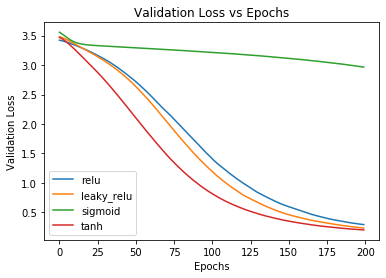

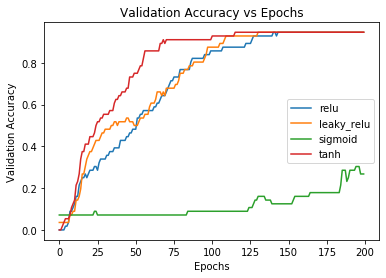

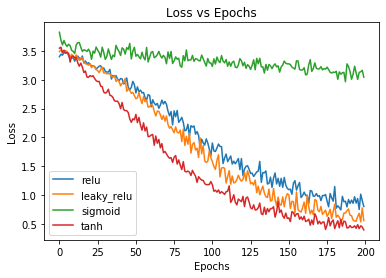

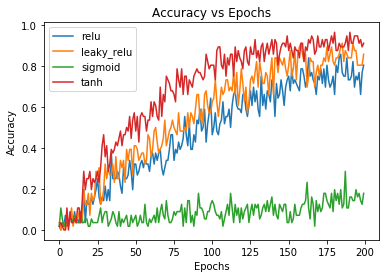

In [35]:
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']
for act in activations :
    model1 = get_model1('leaky_relu',act)
    history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0)
    val_loss_per_function[act]=history1.history['val_loss']
    val_acc_per_function[act]=history1.history['val_accuracy']
    loss_per_function[act]=history1.history['loss']
    acc_per_function[act]=history1.history['accuracy']
    
val_loss = pandas.DataFrame(val_loss_per_function)
val_acc = pandas.DataFrame(val_acc_per_function)
loss = pandas.DataFrame(loss_per_function)
acc = pandas.DataFrame(acc_per_function)

val_loss.plot()
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.show()

val_acc.plot()
plt.title('Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

loss.plot()
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

acc.plot()
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

data = pandas.DataFrame([['1st = leaky_relu','Relu', 'leaky_relu', 'sigmoid', 'tanh'],
                ['acc max',max(acc.relu),max(acc.leaky_relu),max(acc.sigmoid),max(acc.tanh)],
                ['val_acc max',max(val_acc.relu),max(val_acc.leaky_relu),max(val_acc.sigmoid),max(val_acc.tanh)],
                ['mean acc', sum(acc.relu)/len(acc.relu),sum(acc.leaky_relu)/len(acc.leaky_relu),sum(acc.sigmoid)/len(acc.sigmoid),sum(acc.tanh)/len(acc.tanh)],
                ['mean val_acc', sum(val_acc.relu)/len(val_acc.relu),sum(val_acc.leaky_relu)/len(val_acc.leaky_relu),sum(val_acc.sigmoid)/len(val_acc.sigmoid),sum(val_acc.tanh)/len(val_acc.tanh)],      
                ['loss min',min(loss.relu),min(loss.leaky_relu),min(loss.sigmoid),min(loss.tanh)],
                ['val_loss min',min(val_loss.relu),min(val_loss.leaky_relu),min(val_loss.sigmoid),min(val_loss.tanh)],       
                ['mean loss', sum(loss.relu)/len(loss.relu),sum(loss.leaky_relu)/len(loss.leaky_relu),sum(loss.sigmoid)/len(loss.sigmoid),sum(loss.tanh)/len(loss.tanh)],  
                ['mean val_loss',sum(val_loss.relu)/len(val_loss.relu),sum(val_loss.leaky_relu)/len(val_loss.leaky_relu),sum(val_loss.sigmoid)/len(val_loss.sigmoid),sum(val_loss.tanh)/len(val_loss.tanh)]    
                ])

data.to_csv("C:/Users/Julie/Desktop/Projet/leaky_relu.csv")

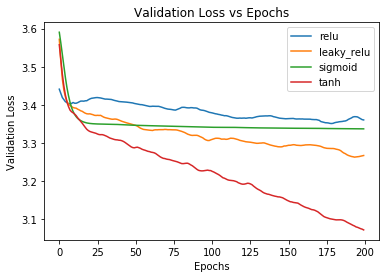

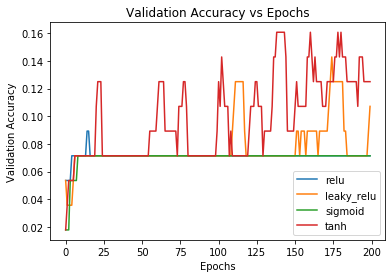

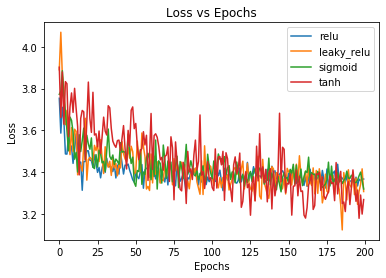

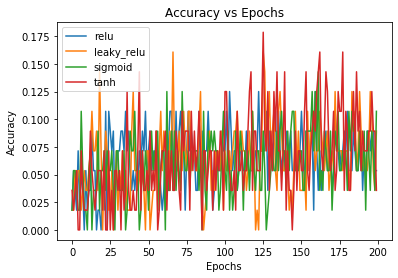

In [36]:
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']
for act in activations :
    model1 = get_model1('sigmoid',act)
    history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0)
    val_loss_per_function[act]=history1.history['val_loss']
    val_acc_per_function[act]=history1.history['val_accuracy']
    loss_per_function[act]=history1.history['loss']
    acc_per_function[act]=history1.history['accuracy']
    
val_loss = pandas.DataFrame(val_loss_per_function)
val_acc = pandas.DataFrame(val_acc_per_function)
loss = pandas.DataFrame(loss_per_function)
acc = pandas.DataFrame(acc_per_function)

val_loss.plot()
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.show()

val_acc.plot()
plt.title('Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

loss.plot()
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

acc.plot()
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

data = pandas.DataFrame([['1st = sigmoid','Relu', 'leaky_relu', 'sigmoid', 'tanh'],
                 ['acc max',max(acc.relu),max(acc.leaky_relu),max(acc.sigmoid),max(acc.tanh)],
                ['val_acc max',max(val_acc.relu),max(val_acc.leaky_relu),max(val_acc.sigmoid),max(val_acc.tanh)],
                ['mean acc', sum(acc.relu)/len(acc.relu),sum(acc.leaky_relu)/len(acc.leaky_relu),sum(acc.sigmoid)/len(acc.sigmoid),sum(acc.tanh)/len(acc.tanh)],
                ['mean val_acc', sum(val_acc.relu)/len(val_acc.relu),sum(val_acc.leaky_relu)/len(val_acc.leaky_relu),sum(val_acc.sigmoid)/len(val_acc.sigmoid),sum(val_acc.tanh)/len(val_acc.tanh)],      
                ['loss min',min(loss.relu),min(loss.leaky_relu),min(loss.sigmoid),min(loss.tanh)],
                ['val_loss min',min(val_loss.relu),min(val_loss.leaky_relu),min(val_loss.sigmoid),min(val_loss.tanh)],       
                ['mean loss', sum(loss.relu)/len(loss.relu),sum(loss.leaky_relu)/len(loss.leaky_relu),sum(loss.sigmoid)/len(loss.sigmoid),sum(loss.tanh)/len(loss.tanh)],  
                ['mean val_loss',sum(val_loss.relu)/len(val_loss.relu),sum(val_loss.leaky_relu)/len(val_loss.leaky_relu),sum(val_loss.sigmoid)/len(val_loss.sigmoid),sum(val_loss.tanh)/len(val_loss.tanh)]    
                ])

data.to_csv("C:/Users/Julie/Desktop/Projet/sigmoid.csv")

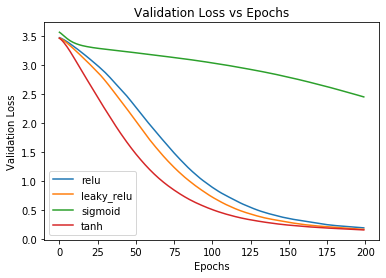

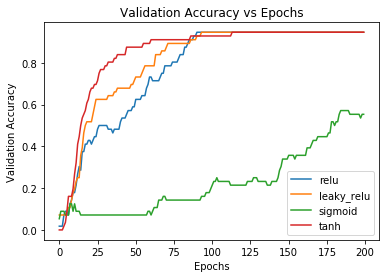

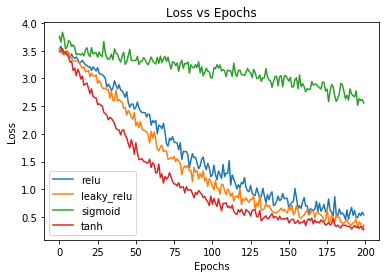

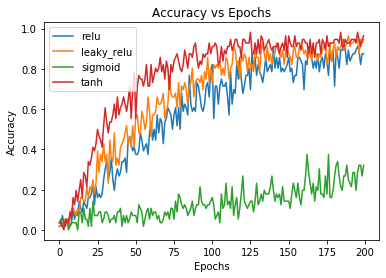

In [37]:
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']
for act in activations :
    model1 = get_model1('tanh',act)
    history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0)
    val_loss_per_function[act]=history1.history['val_loss']
    val_acc_per_function[act]=history1.history['val_accuracy']
    loss_per_function[act]=history1.history['loss']
    acc_per_function[act]=history1.history['accuracy']

val_loss = pandas.DataFrame(val_loss_per_function)
val_acc = pandas.DataFrame(val_acc_per_function)
loss = pandas.DataFrame(loss_per_function)
acc = pandas.DataFrame(acc_per_function)

val_loss.plot()
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.show()

val_acc.plot()
plt.title('Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

loss.plot()
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

acc.plot()
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

data = pandas.DataFrame([['1st = tanh','Relu', 'leaky_relu', 'sigmoid', 'tanh'],
                ['acc max',max(acc.relu),max(acc.leaky_relu),max(acc.sigmoid),max(acc.tanh)],
                ['val_acc max',max(val_acc.relu),max(val_acc.leaky_relu),max(val_acc.sigmoid),max(val_acc.tanh)],
                ['mean acc', sum(acc.relu)/len(acc.relu),sum(acc.leaky_relu)/len(acc.leaky_relu),sum(acc.sigmoid)/len(acc.sigmoid),sum(acc.tanh)/len(acc.tanh)],
                ['mean val_acc', sum(val_acc.relu)/len(val_acc.relu),sum(val_acc.leaky_relu)/len(val_acc.leaky_relu),sum(val_acc.sigmoid)/len(val_acc.sigmoid),sum(val_acc.tanh)/len(val_acc.tanh)],      
                ['loss min',min(loss.relu),min(loss.leaky_relu),min(loss.sigmoid),min(loss.tanh)],
                ['val_loss min',min(val_loss.relu),min(val_loss.leaky_relu),min(val_loss.sigmoid),min(val_loss.tanh)],       
                ['mean loss', sum(loss.relu)/len(loss.relu),sum(loss.leaky_relu)/len(loss.leaky_relu),sum(loss.sigmoid)/len(loss.sigmoid),sum(loss.tanh)/len(loss.tanh)],  
                ['mean val_loss',sum(val_loss.relu)/len(val_loss.relu),sum(val_loss.leaky_relu)/len(val_loss.leaky_relu),sum(val_loss.sigmoid)/len(val_loss.sigmoid),sum(val_loss.tanh)/len(val_loss.tanh)]    
                ])

data.to_csv("C:/Users/Julie/Desktop/Projet/tanh.csv")

# Analyse du modèle ayant les meilleures performances

In [38]:
model = Sequential()
model.add(Dense(128, input_shape=(len(X_train[0]),), activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(len(y_train[0]), activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
hist = model.fit(np.array(X_train), np.array(y_train), epochs=200, batch_size=5, verbose=1,validation_data=(X_test, y_test))
model.save('chatbot_model.h5', hist)

print("model created")

data = pandas.DataFrame([
                ['acc max',max(hist.history['accuracy'])],
                ['val_acc max',max(hist.history['val_accuracy'])],
                ['mean acc', sum(hist.history['accuracy'])/len(hist.history['accuracy'])],
                ['mean val_acc', sum(hist.history['val_accuracy'])/len(hist.history['val_accuracy'])],      
                ['loss min',min(hist.history['loss'])],
                ['val_loss min',min(hist.history['val_loss'])],       
                ['mean loss', sum(hist.history['loss'])/len(hist.history['loss'])],  
                ['mean val_loss',sum(hist.history['val_loss'])/len(hist.history['val_loss'])]    
                ])

data.to_csv("C:/Users/Julie/Desktop/Projet/modeletanhtanh.csv")

Epoch 1/200
12/12 [==============================] - 0s 37ms/step - loss: 3.5748 - accuracy: 0.0000e+00 - val_loss: 3.2894 - val_accuracy: 0.2143
Epoch 2/200
12/12 [==============================] - 0s 10ms/step - loss: 3.3315 - accuracy: 0.0357 - val_loss: 3.0533 - val_accuracy: 0.3571
Epoch 3/200
12/12 [==============================] - 0s 11ms/step - loss: 2.9986 - accuracy: 0.2500 - val_loss: 2.8108 - val_accuracy: 0.3214
Epoch 4/200
12/12 [==============================] - 0s 10ms/step - loss: 2.8695 - accuracy: 0.2679 - val_loss: 2.5647 - val_accuracy: 0.4821
Epoch 5/200
12/12 [==============================] - 0s 8ms/step - loss: 2.6532 - accuracy: 0.3393 - val_loss: 2.3146 - val_accuracy: 0.5536
Epoch 6/200
12/12 [==============================] - 0s 7ms/step - loss: 2.4181 - accuracy: 0.3571 - val_loss: 2.0735 - val_accuracy: 0.6607
Epoch 7/200
12/12 [==============================] - 0s 8ms/step - loss: 2.1943 - accuracy: 0.5179 - val_loss: 1.8386 - val_accuracy: 0.8036
Epoch

12/12 [==============================] - 0s 8ms/step - loss: 0.2172 - accuracy: 0.9643 - val_loss: 0.1125 - val_accuracy: 0.9643
Epoch 59/200
12/12 [==============================] - 0s 7ms/step - loss: 0.1774 - accuracy: 0.9821 - val_loss: 0.1094 - val_accuracy: 0.9643
Epoch 60/200
12/12 [==============================] - 0s 8ms/step - loss: 0.2167 - accuracy: 0.9643 - val_loss: 0.0885 - val_accuracy: 0.9643
Epoch 61/200
12/12 [==============================] - 0s 8ms/step - loss: 0.2850 - accuracy: 0.9107 - val_loss: 0.0888 - val_accuracy: 0.9643
Epoch 62/200
12/12 [==============================] - 0s 8ms/step - loss: 0.1792 - accuracy: 0.9464 - val_loss: 0.0867 - val_accuracy: 0.9643
Epoch 63/200
12/12 [==============================] - 0s 8ms/step - loss: 0.1874 - accuracy: 0.9286 - val_loss: 0.0810 - val_accuracy: 0.9643
Epoch 64/200
12/12 [==============================] - 0s 13ms/step - loss: 0.1898 - accuracy: 0.9643 - val_loss: 0.0804 - val_accuracy: 0.9643
Epoch 65/200
12/12

12/12 [==============================] - 0s 9ms/step - loss: 0.1060 - accuracy: 0.9821 - val_loss: 0.0677 - val_accuracy: 0.9643
Epoch 116/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1178 - accuracy: 0.9821 - val_loss: 0.0659 - val_accuracy: 0.9643
Epoch 117/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0944 - accuracy: 0.9821 - val_loss: 0.0605 - val_accuracy: 0.9643
Epoch 118/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1568 - accuracy: 0.9643 - val_loss: 0.0615 - val_accuracy: 0.9643
Epoch 119/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0949 - accuracy: 0.9821 - val_loss: 0.0589 - val_accuracy: 0.9643
Epoch 120/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1070 - accuracy: 0.9464 - val_loss: 0.0597 - val_accuracy: 0.9643
Epoch 121/200
12/12 [==============================] - 0s 13ms/step - loss: 0.1365 - accuracy: 0.9643 - val_loss: 0.0575 - val_accuracy: 0.9643
Epoch 1

12/12 [==============================] - 0s 10ms/step - loss: 0.1335 - accuracy: 0.9464 - val_loss: 0.0602 - val_accuracy: 0.9643
Epoch 173/200
12/12 [==============================] - 0s 9ms/step - loss: 0.0944 - accuracy: 0.9643 - val_loss: 0.0560 - val_accuracy: 0.9643
Epoch 174/200
12/12 [==============================] - 0s 9ms/step - loss: 0.1157 - accuracy: 0.9643 - val_loss: 0.0537 - val_accuracy: 0.9643
Epoch 175/200
12/12 [==============================] - 0s 13ms/step - loss: 0.1050 - accuracy: 0.9643 - val_loss: 0.0544 - val_accuracy: 0.9643
Epoch 176/200
12/12 [==============================] - 0s 13ms/step - loss: 0.1127 - accuracy: 0.9464 - val_loss: 0.0583 - val_accuracy: 0.9643
Epoch 177/200
12/12 [==============================] - 0s 13ms/step - loss: 0.1198 - accuracy: 0.9643 - val_loss: 0.0565 - val_accuracy: 0.9643
Epoch 178/200
12/12 [==============================] - 0s 7ms/step - loss: 0.0594 - accuracy: 0.9821 - val_loss: 0.0573 - val_accuracy: 0.9643
Epoch 179

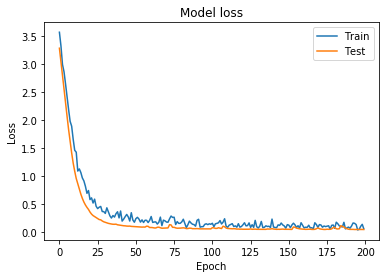

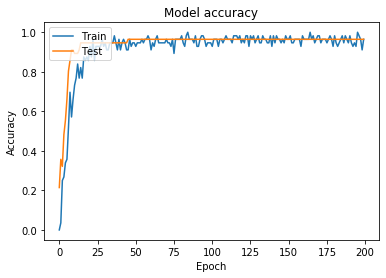

In [39]:
import matplotlib.pyplot as plt

# loss plot function
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')  
    plt.show()
    
# accuracy plot function    
def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# plot loss and accuracy curves
plot_loss(hist.history['loss'], hist.history['val_loss'])
plot_accuracy(hist.history['accuracy'], hist.history['val_accuracy'])

In [40]:
# Question 8
# define new get_model function without arguments

def get_model():
    model = Sequential()
    model.add(Dense(128, input_shape=(len(X_train[0]),), activation="tanh"))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(len(y_train[0]), activation='softmax'))
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Question 10 


# Question 9
# define an array of batch sizes
epochs=[70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270]

# declare lists for saving accuracies and losses 
val_loss=[]
val_acc=[]
acc=[]
loss=[]

# train the model with different batch sizes
for bepoch in epochs:
    # get the initial model at each iteration for fair comparison purpose 
    model=get_model()   
    
    # train the model
    h=model.fit(X_train, y_train, epochs=bepoch, verbose=0)    
    
    # save rounded loss values in the list 
    val_loss.append(np.round(model.evaluate(X_test, y_test, verbose=0)[0],4))    
    # save rounded accuracy values in the list
    val_acc.append(np.round(model.evaluate(X_test, y_test, verbose=0)[1],4))
    loss.append(np.round(model.evaluate(X_test, y_test, verbose=0)[0],4))    
    # save rounded accuracy values in the list
    acc.append(np.round(model.evaluate(X_test, y_test, verbose=0)[1],4))

# Question 11
# print results 
print("{:10} | {:7} | {:8}".format('Number of epoch', 'Loss', 'Accuracy'))
for i in range(len(epochs)):
    print("{:10} | {:7} | {:8}".format(epochs[i], val_loss[i], val_acc[i]))    

Number of epoch | Loss    | Accuracy
        70 |  0.9095 |   0.9107
        80 |  0.7106 |   0.9286
        90 |  0.6002 |   0.9464
       100 |  0.4898 |   0.9464
       110 |  0.4226 |   0.9464
       120 |  0.3576 |   0.9464
       130 |  0.2924 |   0.9464
       140 |  0.2608 |   0.9464
       150 |  0.2392 |   0.9464
       160 |  0.2069 |   0.9464
       170 |  0.2011 |   0.9464
       180 |  0.1818 |   0.9464
       190 |  0.1617 |   0.9464
       200 |   0.155 |   0.9464
       210 |  0.1502 |   0.9464
       220 |   0.132 |   0.9464
       230 |  0.1289 |   0.9643
       240 |  0.1214 |   0.9464
       250 |  0.1191 |   0.9643
       260 |  0.1105 |   0.9643
       270 |  0.1056 |   0.9643


In [41]:
data = pandas.DataFrame([
                ['number of epoch',epochs],
                ['val_acc',val_acc],
                ['val_loss',val_loss],
                ])
data.to_csv("C:/Users/Julie/Desktop/Projet/epoch2.csv")

In [44]:
modelFinal = Sequential()
modelFinal.add(Dense(128, input_shape=(len(X_train[0]),), activation="tanh"))
modelFinal.add(Dropout(0.5))
modelFinal.add(Dense(64, activation='tanh'))
modelFinal.add(Dropout(0.5))
modelFinal.add(Dense(len(y_train[0]), activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
modelFinal.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = modelFinal.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0)
modelFinal.save("modelFinal.h5")

In [46]:
## converti model keras en onnx 
import onnx
import keras2onnx
from keras.models import load_model

onnx_model_name = 'modelFinal.onnx'

model = load_model('modelFinal.h5')

onnx_model = keras2onnx.convert_keras(model, model.name)

onnx.save_model(onnx_model, onnx_model_name)

tf executing eager_mode: True
tf.keras model eager_mode: False
The ONNX operator number change on the optimization: 15 -> 9
The maximum opset needed by this model is only 9.
